In [38]:
# here we are going to study lasso regression
# also known  as L1 regression .....

# extreme important points

#  Polynomial Regression → degree ↑ → overfit.
#  Ridge/Lasso → λ ↑ → underfit.

In [39]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[26.9714105]
-0.8624885473427237


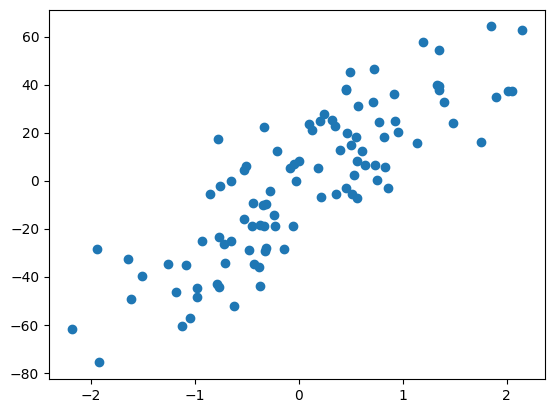

In [40]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.232e+04, tolerance: 7.940e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

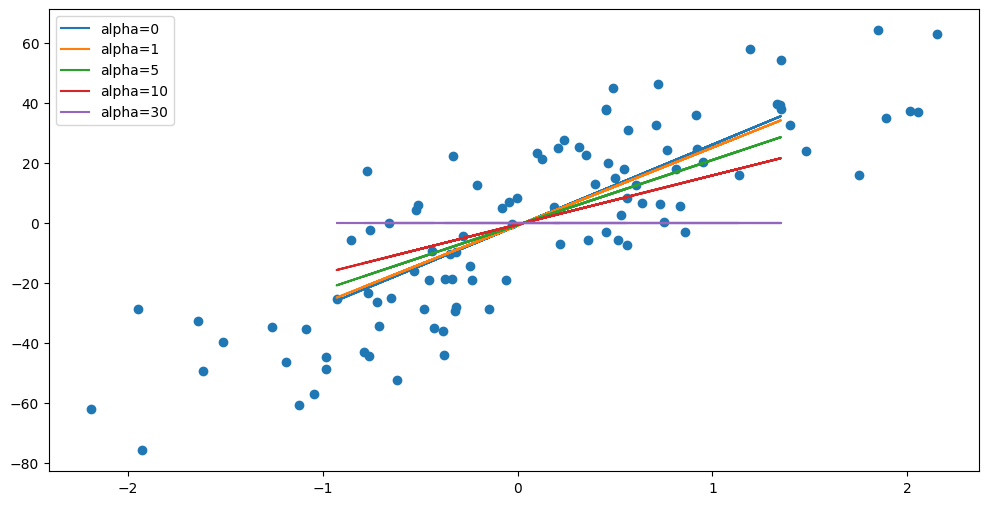

In [41]:

alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()
    # when alpha is 0 ... it following the the linear regression
    # plotting ...

    # when alpha is 30 our slope or cofficient is 0
    # and that is the major difference between ridge and lasso
    # in ridge our cofficient never be 0 but in lasso
    # our cofficient could be 0 too ...

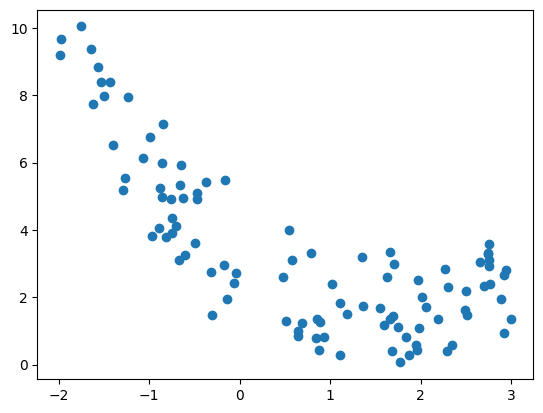

In [42]:

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

# here we are generating non linear  regression data
#  then we see the difference



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.722e+01, tolerance: 6.023e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

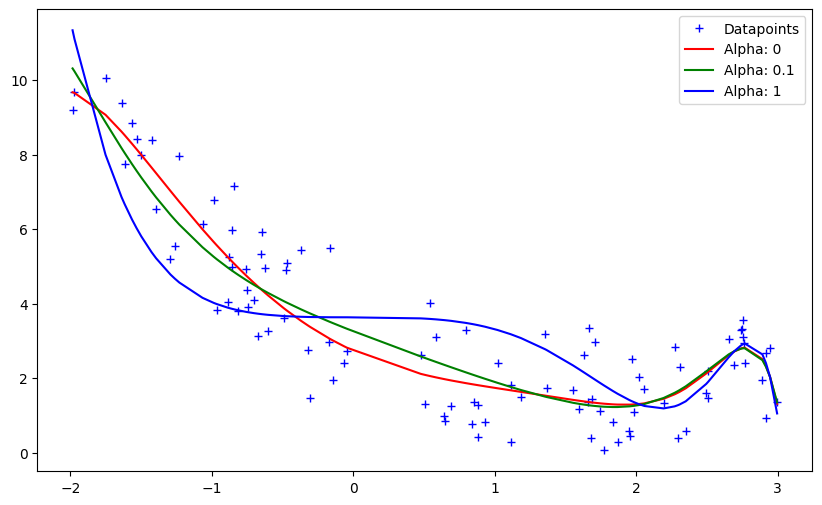

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

# here we have implanted ridge regression  over  nonlinear data set
# for alpha is 0 showing normal linear regression
# for 0.1 ..its better
# and for 1 its is underfitting
# best is 0.1 neither underfitting nor overfitting '


In [44]:
# we know that in high dimensional data the overfitting scenario is
# very high.......... if its is the case of polynomial regression
# and we keep incresing the degree then the overfitting case is
# extremely high...

# whereas ,
#             ridge regression

#         if we implants the ridge regression over it the
#         cofficient will never be 0 ...
#         means u have a  value of cofficient whether its close
#         to ... so u have to keep the column or that feature ....

#         lasso regression

#     could convert the cofficient to 0
#     and indicates that these coloumns  have no weightages
#     anymore ....so we are doing feature selection
#     and we  are reducing the dimensions ...of the data...

# conclusion :
#             if we are working at the high dimensional ....
#             we prefer to use  lasso because it filters
#             the columns ....


In [45]:
# my doubt

# So why, if a coefficient is 0,
# it becomes non-relevant, but when a coefficient is even high negative
# it becomes important?

In [46]:
# When the coefficient is 0:

# In the regression equation:

#                   y = w(not) + w1x1 + w2x2 + ... + wnxn
# This means that changing xj will
# have no effect on the prediction.
# Therefore, the feature becomes irrelevant to the model.

# The magni                                                        tude mod wj  shows how strongly
# the feature influences the output.

# A positive coefficient means: as the feature increases,
#   the output increases.

# A negative coefficient means: as the feature increases,
#       the output decreases.

# In both cases, the feature still has a strong effect on the output,
# so it’s important — the sign only changes
#  the direction of the relationship.

In [50]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# we have generated a polynomial dataset .....
# and now we are experimenting several
# lamra values to see the results  by using
# ridge regression

In [51]:

data = load_diabetes()

In [52]:
v = pd.DataFrame(data.data,columns=data.feature_names)
v['TARGET'] = data.target

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)
v.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [57]:

coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

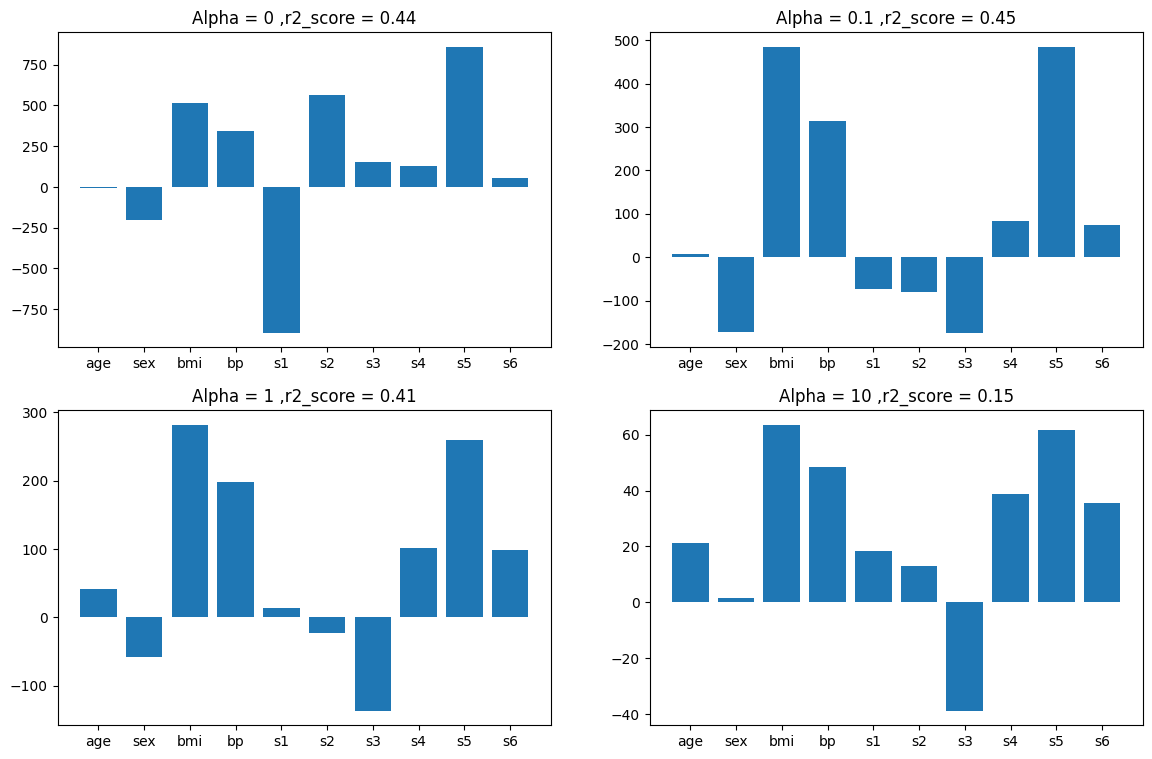

In [59]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

# at alpha is at  0

#  we could see that at s1 bmi and s5 columns are quite bigger
#  means cofficient is quite greater hence they carries extreme
#  weightage for my model ...when m

# when alpa  is at 0.1

#  bmi bp and s5 are palying key role in making my
# outpus
          #  but we also good by takin 0.1 sex also now palying
          #  important role
          #  also s1 becomes non relevent after applying 0.1 lamra

    # we could now also get deep insight by analysing the
    # lamra 1 and 30 ....

  # as we took lamra 10 our all coffients  turned to 0 .... hence we could
  # see it is the case of undefitting  even our r2 score is in negative


# conclusion
#            by seeing r2 score  in figure a and b
#            we could see thar age s1 s2 sex does not  have much weightage




In [ ]:
# higher cofficients  effected more